<h1>Census Exploration Data: Texas
    
<h5> Here I will be exploring data made available by "Census Reporter" on the state Texas. I aim to gain a better understanding on the citizens in that state to see if I can make any correlations to the information I have gathered about gun data. Given that we are zeroing in on election years we wanted to compare two states that tend to be blue and red states. Seeing that we live in a blue state we wanted to futher dissect a red state such as Texas which has a completely different relationship with gun control than that of California. Here I investigate census data on education attainment, to understand how educated it is as a state. 
<h5> By Stacy Carlos Vasquez

<h1> Importing

Here I am importing pandas in order to do general wrangling tasks.

In [74]:
import pandas as pd

Then to read and create visualizations of spatial data I have to import geopandas. 

In [75]:
import geopandas as gpd

By importing contextability it allows me to construct basemaps

In [76]:
import contextily as ctx

I finally import the matplotlib.pyplot to have a greater capabilities of the plots I am about to create.

In [77]:
import matplotlib.pyplot as plt

here I call to load a geojson file that will let me handle "spatial data exploration" and I assign it to the variable gdf in order to make it easier to reference to in my code.

In [78]:
gdf = gpd.read_file('acs2019_5yr_B15002_05000US48191.geojson')

I want to pull the first 5 rows of data in my set so i use the command .head() to get a glimce of what I am working with

In [79]:
gdf.head()

,geoid,name,B15002001,"B15002001, Error",B15002002,"B15002002, Error",B15002003,"B15002003, Error",B15002004,"B15002004, Error",...,"B15002031, Error",B15002032,"B15002032, Error",B15002033,"B15002033, Error",B15002034,"B15002034, Error",B15002035,"B15002035, Error",geometry
0,05000US48001,"Anderson County, TX",42073.0,233.0,26707.0,179.0,215.0,83.0,206.0,83.0,...,254.0,1359.0,282.0,660.0,145.0,36.0,32.0,47.0,40.0,"MULTIPOLYGON (((-95.67753 32.05163, -95.67360 ..."
1,05000US48003,"Andrews County, TX",10700.0,158.0,5389.0,68.0,157.0,84.0,104.0,76.0,...,145.0,488.0,178.0,202.0,112.0,47.0,67.0,0.0,21.0,"MULTIPOLYGON (((-102.86649 32.08714, -102.8666..."
2,05000US48005,"Angelina County, TX",57275.0,48.0,27523.0,63.0,666.0,196.0,255.0,115.0,...,388.0,3469.0,392.0,1594.0,288.0,185.0,86.0,71.0,48.0,"MULTIPOLYGON (((-94.86268 31.23236, -94.86227 ..."
3,05000US48007,"Aransas County, TX",17878.0,499.0,8572.0,379.0,95.0,68.0,101.0,88.0,...,213.0,1326.0,302.0,513.0,176.0,117.0,103.0,66.0,53.0,"MULTIPOLYGON (((-97.20401 28.08081, -97.19783 ..."
4,05000US48009,"Archer County, TX",6137.0,36.0,3000.0,35.0,2.0,3.0,28.0,22.0,...,95.0,560.0,100.0,185.0,61.0,66.0,40.0,20.0,17.0,"MULTIPOLYGON (((-98.75200 33.39587, -98.75494 ..."


by using the .plot command I can now plot the data made available in gdf however by applying a figsize of (10,10) I can state what size I want the plot to be, and as can be seeing by plotting all the available data in texas on education it will show me a visualization of the state. 

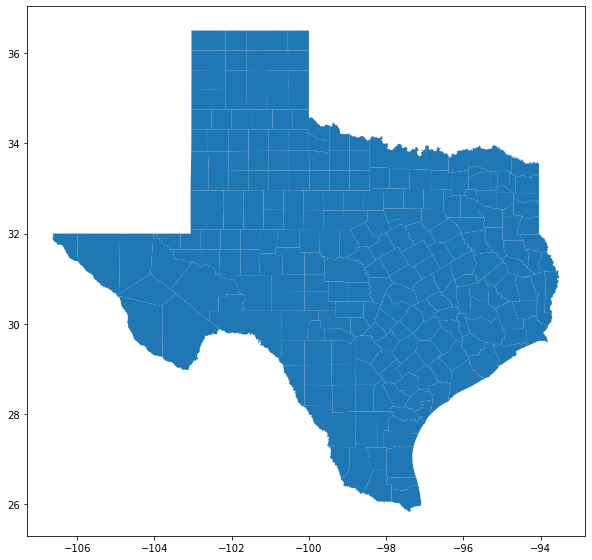

In [80]:
gdf.plot(figsize=(10,10))

<h1> Dropping Columns

Seeing that I only want to get data on the amount of females and males that have a highschool degree & females and males that have a bachelor degree I will remove any other colums that pertain to other education level information. 

First I output the existing columns as a list.

In [81]:
list(gdf)

['geoid',
 'name',
 'B15002001',
 'B15002001, Error',
 'B15002002',
 'B15002002, Error',
 'B15002003',
 'B15002003, Error',
 'B15002004',
 'B15002004, Error',
 'B15002005',
 'B15002005, Error',
 'B15002006',
 'B15002006, Error',
 'B15002007',
 'B15002007, Error',
 'B15002008',
 'B15002008, Error',
 'B15002009',
 'B15002009, Error',
 'B15002010',
 'B15002010, Error',
 'B15002011',
 'B15002011, Error',
 'B15002012',
 'B15002012, Error',
 'B15002013',
 'B15002013, Error',
 'B15002014',
 'B15002014, Error',
 'B15002015',
 'B15002015, Error',
 'B15002016',
 'B15002016, Error',
 'B15002017',
 'B15002017, Error',
 'B15002018',
 'B15002018, Error',
 'B15002019',
 'B15002019, Error',
 'B15002020',
 'B15002020, Error',
 'B15002021',
 'B15002021, Error',
 'B15002022',
 'B15002022, Error',
 'B15002023',
 'B15002023, Error',
 'B15002024',
 'B15002024, Error',
 'B15002025',
 'B15002025, Error',
 'B15002026',
 'B15002026, Error',
 'B15002027',
 'B15002027, Error',
 'B15002028',
 'B15002028, Error',
 

then I create a list of columns that I'll keep. which are males that have a highschool degree, females that have a highschool degree, males that have a bachelor degree, and females that have a bachelor degree

In [82]:
columns_to_keep = ['geoid',
 'name',
 'B15002001',
 'B15002011',
 'B15002015',
 'B15002028',
 'B15002032',
 'geometry']

Here I then redefine gdf with only the columns to keep

In [83]:
gdf = gdf[columns_to_keep]

just to check that the redefinition did what I wanted, and that there is only the data columns I want, I used the .head() command to view it 

In [84]:
gdf.head()

,geoid,name,B15002001,B15002011,B15002015,B15002028,B15002032,geometry
0,05000US48001,"Anderson County, TX",42073.0,10778.0,1511.0,5583.0,1359.0,"MULTIPOLYGON (((-95.67753 32.05163, -95.67360 ..."
1,05000US48003,"Andrews County, TX",10700.0,2136.0,326.0,1603.0,488.0,"MULTIPOLYGON (((-102.86649 32.08714, -102.8666..."
2,05000US48005,"Angelina County, TX",57275.0,9688.0,2944.0,8390.0,3469.0,"MULTIPOLYGON (((-94.86268 31.23236, -94.86227 ..."
3,05000US48007,"Aransas County, TX",17878.0,2590.0,1097.0,2990.0,1326.0,"MULTIPOLYGON (((-97.20401 28.08081, -97.19783 ..."
4,05000US48009,"Archer County, TX",6137.0,1188.0,435.0,987.0,560.0,"MULTIPOLYGON (((-98.75200 33.39587, -98.75494 ..."


Instead of having those numbers as colums identifiers for the data it's refering to, I am going to rename them to make easier for me me to idetify and refer to. to do that I first make the column names into a list.

In [85]:
list(gdf)

['geoid',
 'name',
 'B15002001',
 'B15002011',
 'B15002015',
 'B15002028',
 'B15002032',
 'geometry']

now I replace the values with the appropriate column names by using the command .columns

In [86]:
gdf.columns= ['geoid',
 'name',
 'Total',
 'males with HS degree',
 'males with BA degree',
 'females with HS degree',
 'females with BA degree',
 'geometry']


to check again if it has been updated I use .head()

In [87]:
gdf.head()

,geoid,name,Total,males with HS degree,males with BA degree,females with HS degree,females with BA degree,geometry
0,05000US48001,"Anderson County, TX",42073.0,10778.0,1511.0,5583.0,1359.0,"MULTIPOLYGON (((-95.67753 32.05163, -95.67360 ..."
1,05000US48003,"Andrews County, TX",10700.0,2136.0,326.0,1603.0,488.0,"MULTIPOLYGON (((-102.86649 32.08714, -102.8666..."
2,05000US48005,"Angelina County, TX",57275.0,9688.0,2944.0,8390.0,3469.0,"MULTIPOLYGON (((-94.86268 31.23236, -94.86227 ..."
3,05000US48007,"Aransas County, TX",17878.0,2590.0,1097.0,2990.0,1326.0,"MULTIPOLYGON (((-97.20401 28.08081, -97.19783 ..."
4,05000US48009,"Archer County, TX",6137.0,1188.0,435.0,987.0,560.0,"MULTIPOLYGON (((-98.75200 33.39587, -98.75494 ..."


Given that this is raw data I want to normalize it and add colums to my data that give %'s of each education level 

In [88]:
gdf['percent males with HS degree'] = gdf['males with HS degree']/gdf['Total']*100
gdf['percent males with BA degree'] = gdf['males with BA degree']/gdf['Total']*100
gdf['percent females with HS degree'] = gdf['females with HS degree']/gdf['Total']*100
gdf['percent females with BA degree'] = gdf['females with BA degree']/gdf['Total']*100

to check again if it has been updated I use .head() and see if the columns have been added

In [89]:
gdf.head()

,geoid,name,Total,males with HS degree,males with BA degree,females with HS degree,females with BA degree,geometry,percent males with HS degree,percent males with BA degree,percent females with HS degree,percent females with BA degree
0,05000US48001,"Anderson County, TX",42073.0,10778.0,1511.0,5583.0,1359.0,"MULTIPOLYGON (((-95.67753 32.05163, -95.67360 ...",25.617379,3.591377,13.269793,3.230100
1,05000US48003,"Andrews County, TX",10700.0,2136.0,326.0,1603.0,488.0,"MULTIPOLYGON (((-102.86649 32.08714, -102.8666...",19.962617,3.046729,14.981308,4.560748
2,05000US48005,"Angelina County, TX",57275.0,9688.0,2944.0,8390.0,3469.0,"MULTIPOLYGON (((-94.86268 31.23236, -94.86227 ...",16.914884,5.140113,14.648625,6.056744
3,05000US48007,"Aransas County, TX",17878.0,2590.0,1097.0,2990.0,1326.0,"MULTIPOLYGON (((-97.20401 28.08081, -97.19783 ...",14.487079,6.136033,16.724466,7.416937
4,05000US48009,"Archer County, TX",6137.0,1188.0,435.0,987.0,560.0,"MULTIPOLYGON (((-98.75200 33.39587, -98.75494 ...",19.357993,7.088154,16.082777,9.124980


<h1> Makin' Maps!

Here I am using the first 500 rows of the gdf dataset to plot. I also add arguments as to specify the utilization of the column "percent males with HS degree". I also state to have a legend by making it true. I also state to make it have blue tones (blue toned maps are visualizations for male data)

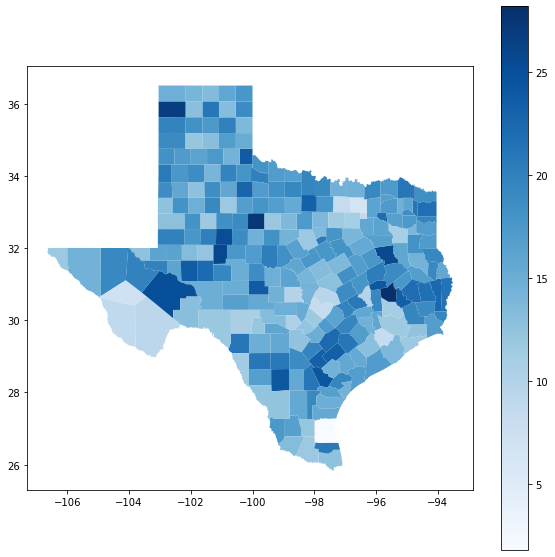

In [111]:
gdf.head(500).plot(figsize=(10,10),column='percent males with HS degree',legend=True, cmap='Blues')

Here I am using the first 500 rows of the gdf dataset to plot. I also add arguments as to specify the utilization of the column "percent males with BA degree". I also state to have a legend by making it true. I also state to make it have blue tones (blue toned maps are visualizations for male data)

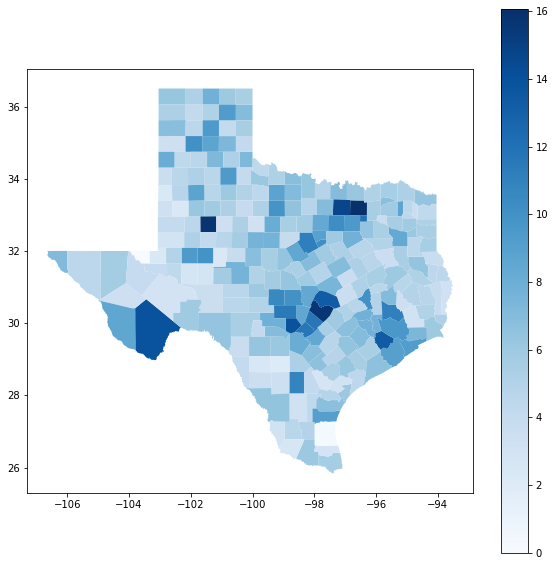

In [112]:
gdf.head(500).plot(figsize=(10,10),column='percent males with BA degree',legend=True, cmap='Blues')

Here I am using the first 500 rows of the gdf dataset to plot. I also add arguments as to specify the utilization of the column "percent females with HS degree". I also state to have a legend by making it true. I also state to make it have red tones (red toned maps are visualizations for female data)

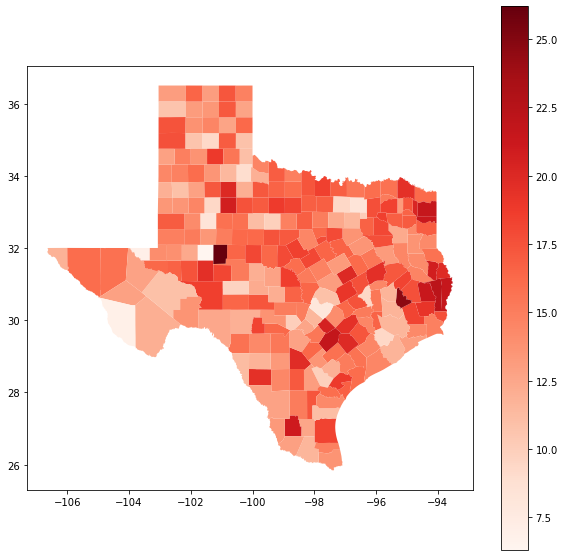

In [109]:
gdf.head(500).plot(figsize=(10,10),column='percent females with HS degree',legend=True, cmap='Reds')

Here I am using the first 500 rows of the gdf dataset to plot. I also add arguments as to specify the utilization of the column "percent females with BA degree". I also state to have a legend by making it true. I also state to make it have red tones (red toned maps are visualizations for female data)

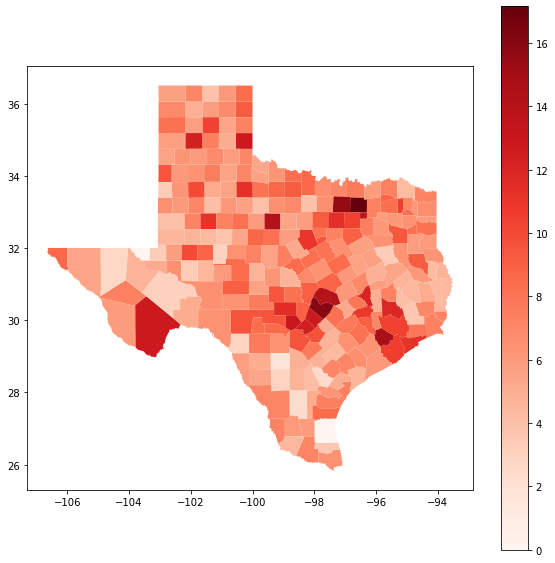

In [110]:
gdf.head(500).plot(figsize=(10,10),column='percent females with BA degree',legend=True, cmap='Reds')